#  데이터 가져오기

In [176]:
from pydoc import describe
from pyexpat import features
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes=load_diabetes()


In [134]:
dfX = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfy = pd.DataFrame(diabetes.target, columns=['target'])
dfX

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [135]:
dfy

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [136]:
X = dfX.values
y = dfy['target'].values

#  train 데이터와 test 데이터로 분리하기

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 모델 준비하기

In [138]:
W = np.random.rand(10)
b = np.random.rand()


def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

# 손실함수 loss 정의하기

In [139]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X,W,b,y):
    predictions = model(X,W,b)
    Loss = MSE(predictions,y)
    return Loss

# 기울기를 구하는 gradient 함수 구현하기

In [140]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


# 하이퍼 파라미터인 학습률 설정하기

In [148]:
LEARNING_RATE = 0.1

#(9) 모델 학습하기
losses = []

for i in range(1, 20000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2867.0381
Iteration 20 : Loss 2867.0377
Iteration 30 : Loss 2867.0373
Iteration 40 : Loss 2867.0369
Iteration 50 : Loss 2867.0365
Iteration 60 : Loss 2867.0362
Iteration 70 : Loss 2867.0358
Iteration 80 : Loss 2867.0354
Iteration 90 : Loss 2867.0350
Iteration 100 : Loss 2867.0346
Iteration 110 : Loss 2867.0342
Iteration 120 : Loss 2867.0338
Iteration 130 : Loss 2867.0334
Iteration 140 : Loss 2867.0330
Iteration 150 : Loss 2867.0326
Iteration 160 : Loss 2867.0322
Iteration 170 : Loss 2867.0318
Iteration 180 : Loss 2867.0315
Iteration 190 : Loss 2867.0311
Iteration 200 : Loss 2867.0307
Iteration 210 : Loss 2867.0303
Iteration 220 : Loss 2867.0299
Iteration 230 : Loss 2867.0295
Iteration 240 : Loss 2867.0291
Iteration 250 : Loss 2867.0288
Iteration 260 : Loss 2867.0284
Iteration 270 : Loss 2867.0280
Iteration 280 : Loss 2867.0276
Iteration 290 : Loss 2867.0272
Iteration 300 : Loss 2867.0269
Iteration 310 : Loss 2867.0265
Iteration 320 : Loss 2867.0261
Iteration 330 : L

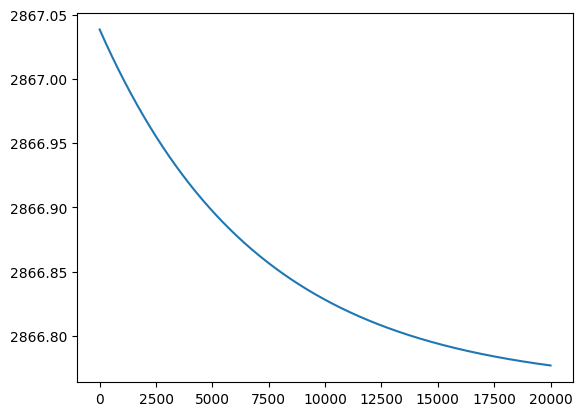

In [149]:
plt.plot(losses)
plt.show()

# test 데이터에 대한 성능 확인하기

In [150]:
predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

2992.6653248492557


In [156]:
X_test

array([[ 0.04170844, -0.04464164, -0.03207344, -0.06189218,  0.07961226,
         0.05098192,  0.05600338, -0.00997249,  0.04506655, -0.05906719],
       [-0.07816532, -0.04464164, -0.04069594, -0.08141314, -0.10063757,
        -0.11279473,  0.02286863, -0.0763945 , -0.02029232, -0.05078298],
       [-0.07090025, -0.04464164,  0.09295276,  0.01267997,  0.02044629,
         0.04252691,  0.00077881,  0.00035983, -0.05453964, -0.0010777 ],
       [-0.02367725, -0.04464164, -0.06548562, -0.08141314, -0.03871969,
        -0.05360967,  0.05968501, -0.0763945 , -0.03712884, -0.04249877],
       [ 0.03807591,  0.05068012,  0.00564998,  0.03220094,  0.00668676,
         0.01747503, -0.02499266,  0.03430886,  0.01482098,  0.06105391],
       [ 0.04170844,  0.05068012,  0.01966154,  0.05974375, -0.00569682,
        -0.00256647, -0.02867429, -0.00259226,  0.0311926 ,  0.00720652],
       [ 0.05987114,  0.05068012,  0.07678558,  0.02531524,  0.00118295,
         0.01684873, -0.05444576,  0.03430886

# 정답 데이터와 예측한 데이터 시각화하기


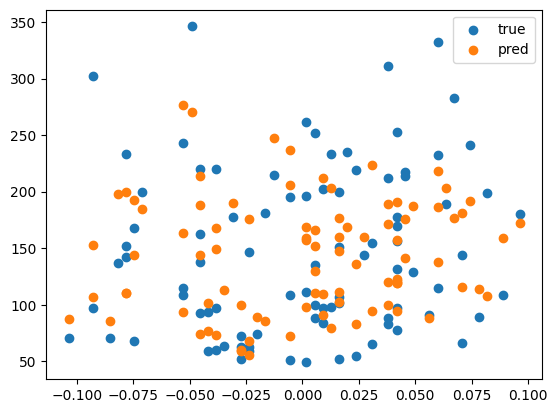

In [167]:
plt.scatter(X_test[:,0], y_test, label="true")
plt.scatter(X_test[:,0], predictions, label="pred")
plt.legend()           
plt.show()     

평가항목에서, 첫번째 특징만을 추출해서 예측값과 실제를 시각화하라고 했음! age와 당뇨병과의 예측값을 보여주는 그래프!